<a href="https://colab.research.google.com/github/RameshSTA/HEARTATTACH-analysis-using-ML/blob/main/Heart_attack_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
A heart attack, also known as a myocardial infarction, occurs when a part of the heart muscle doesn't receive enough blood. Without treatment to restore blood flow, the longer the time passes, the more damage is done to the heart muscle. Coronary artery disease (CAD) is the primary cause of a heart attack.

In addition to coronary artery disease, other factors such as high blood pressure, high cholesterol, smoking, obesity, physical inactivity, diabetes, and a family history of heart disease can increase the risk of a heart attack. Recognizing the signs and symptoms of a heart attack, such as chest pain, shortness of breath, nausea, and lightheadedness, is critical for prompt medical attention. Treatment options for a heart attack may include medication, surgery, lifestyle changes, or a combination of these approaches.

In [1]:
#importing all the depedencies 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report

        
import warnings
warnings.filterwarnings("ignore")

# DATA  contents 

age - age in years

sex - sex (1 = male; 0 = female)

cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

ca - number of major vessels (0-3) colored by flourosopy

thal - 2 = normal; 1 = fixed defect; 3 = reversable defect

num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)

In [9]:
# reading the dataset  
df = pd.read_csv("heart.csv")
df.sample(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2,1
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1


In [11]:
# infoormation of the data set  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
#describing basic statistics of data 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [14]:
#missing value analysis  
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [15]:
#columns analysis  
def grab_col_names(dataframe, cat_th=10):

    # cat_cols
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]    
    cat_cols = cat_cols + num_but_cat
    

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Variables: {dataframe.shape[1]}")
    print(f'Number of Categorical Variables: {len(cat_cols)}')
    print(f'Number of Numeric Variables: {len(num_cols)}')
    
    
    return cat_cols, num_cols

In [16]:
cat_cols, num_cols = grab_col_names(df)

Variables: 14
Number of Categorical Variables: 9
Number of Numeric Variables: 5


In [17]:
print(cat_cols)
print(num_cols)

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']


In [18]:
# Unique Value Analysis - we can compare this part with the output above 
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [19]:
# Categorical Feature
cat_cols

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

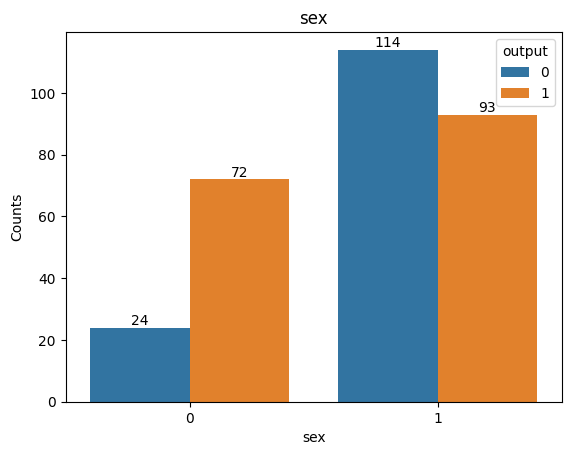

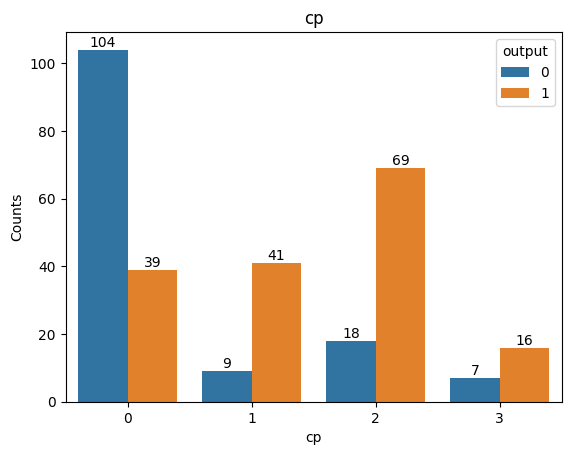

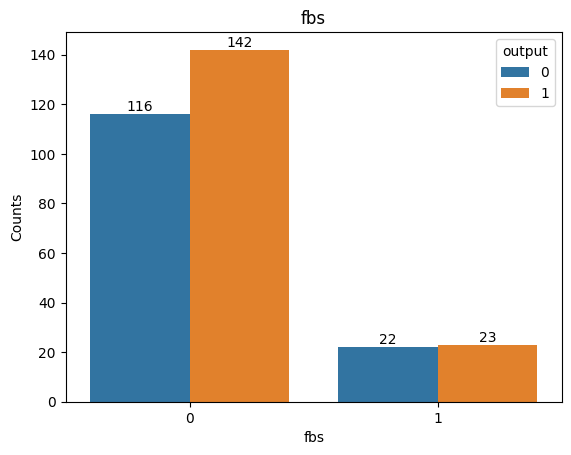

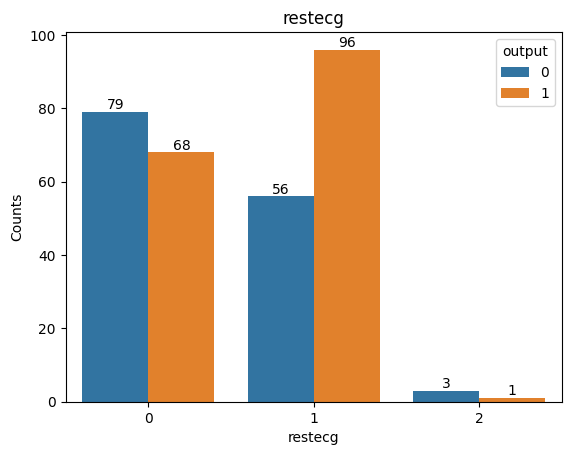

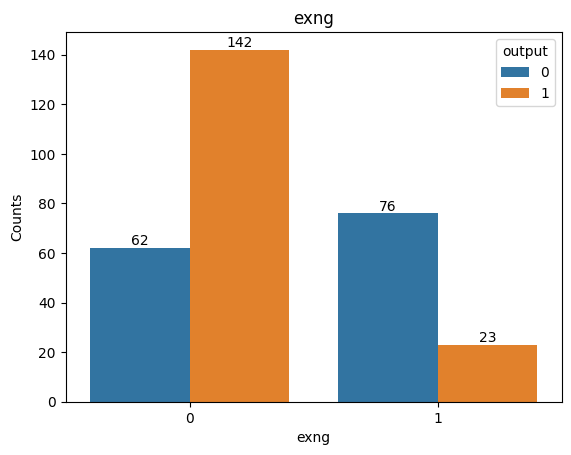

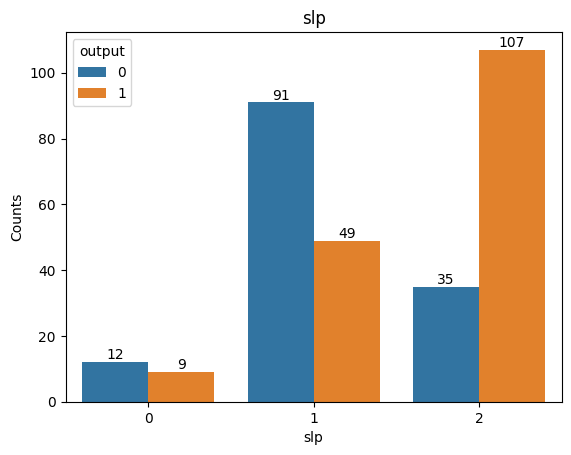

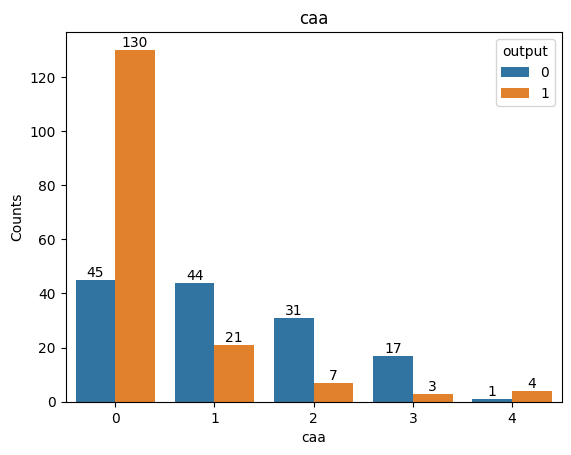

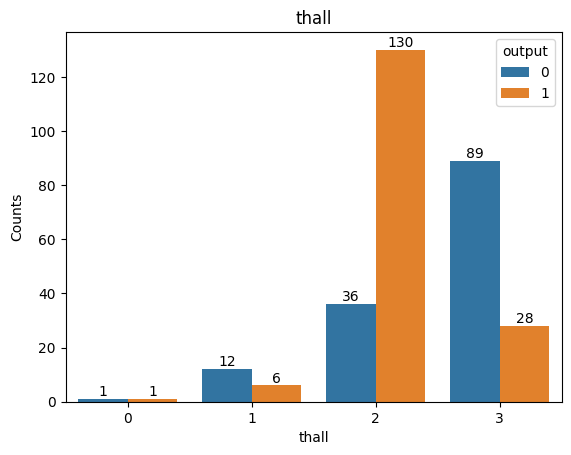

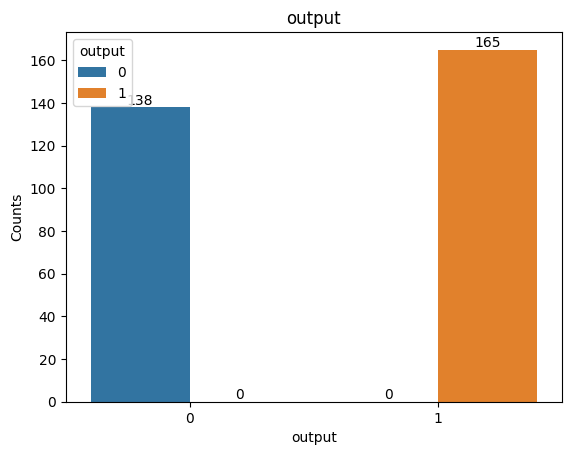

In [20]:
for i in cat_cols:
    fig, ax = plt.subplots()
    sns.countplot(ax = ax, data = df, x = df[i], hue = "output")
    ax.set(ylabel='Counts', title=i)
    
    for j in [0,1]:
        ax.bar_label(ax.containers[j])

In [21]:
# add the target variable to the numeric column list
num_cols.append("output")   
num_cols

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']

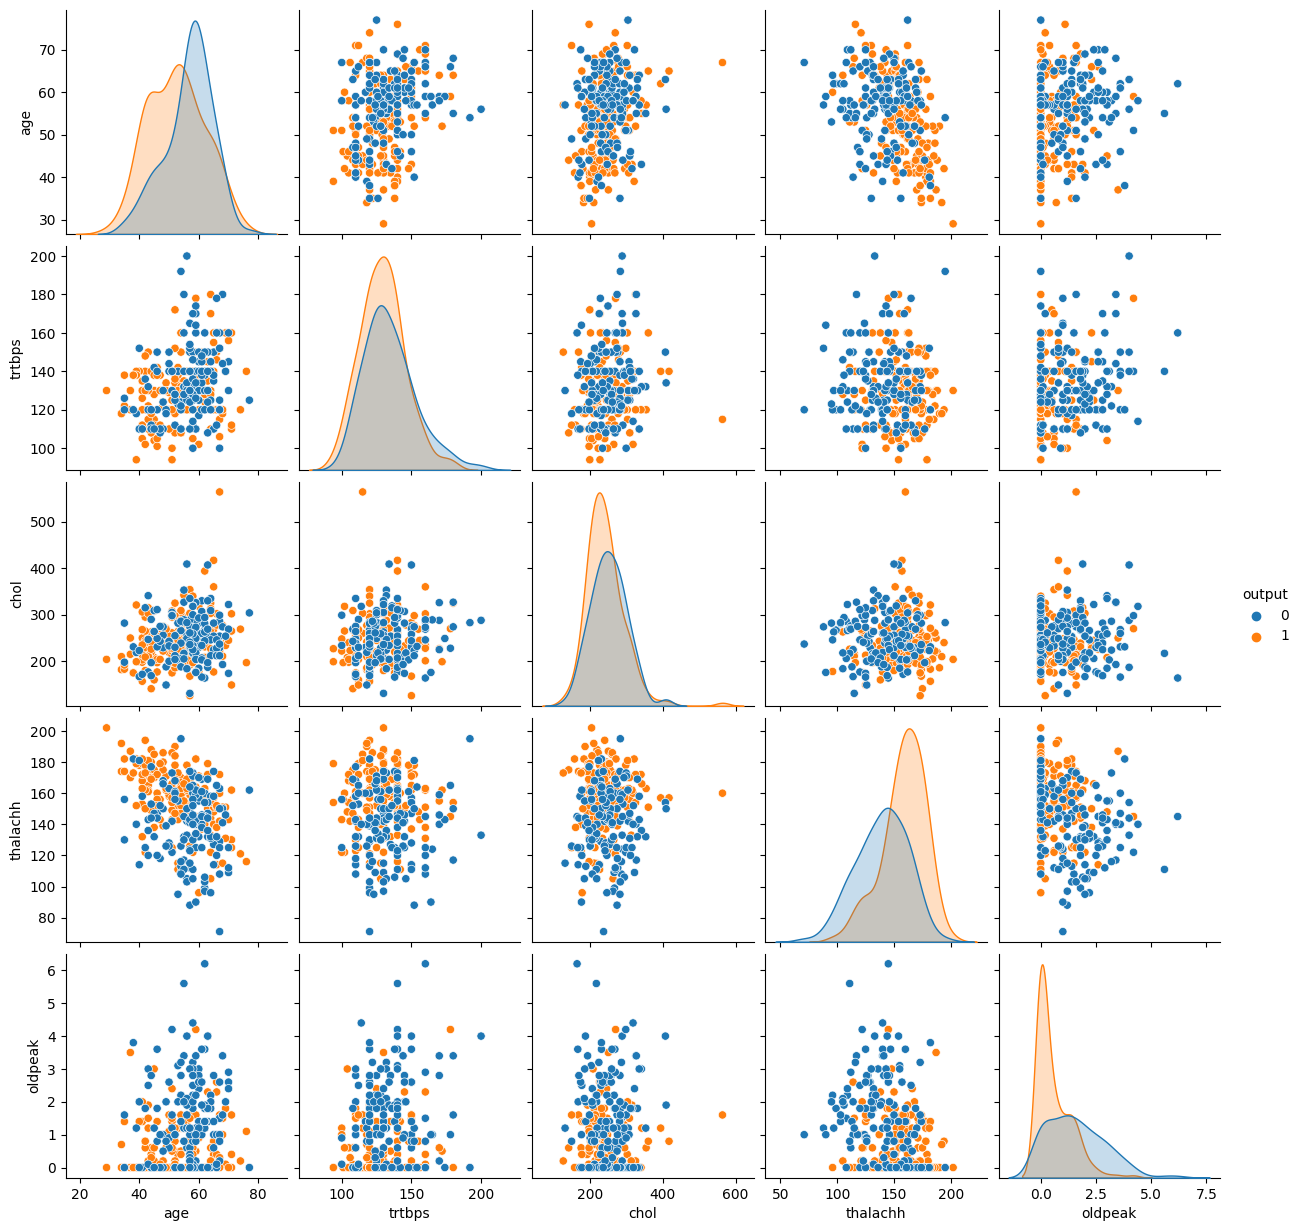

In [22]:
df_numeric = df.loc[:, num_cols]
sns.pairplot(df_numeric, hue = "output", diag_kind = "kde")
plt.show()

In [23]:
def histPlot(num):
    sns.histplot(data = df, x = num, bins = 50, kde = True)
    print("{} distribution with hist:".format(num))
    plt.show()

age distribution with hist:


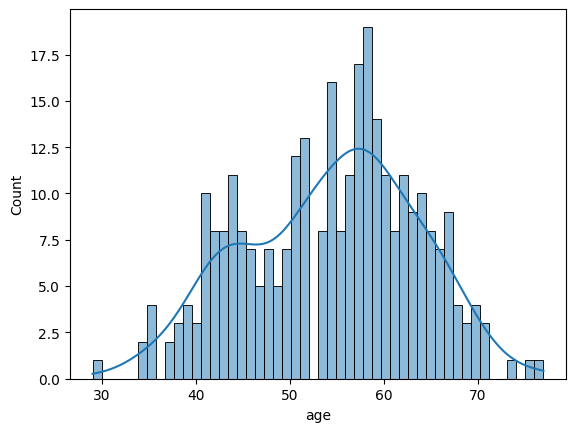

trtbps distribution with hist:


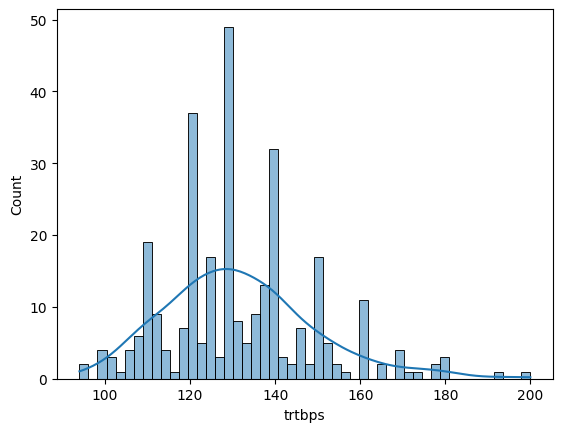

chol distribution with hist:


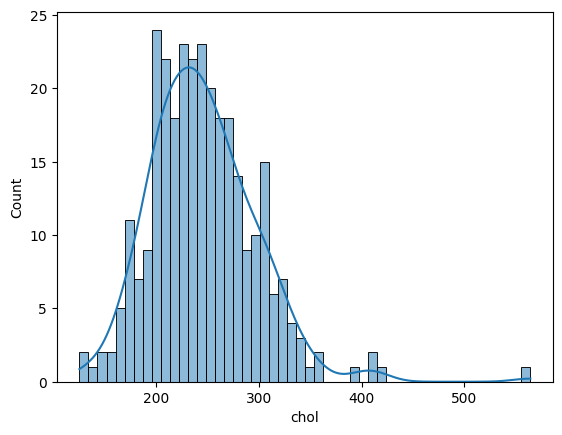

thalachh distribution with hist:


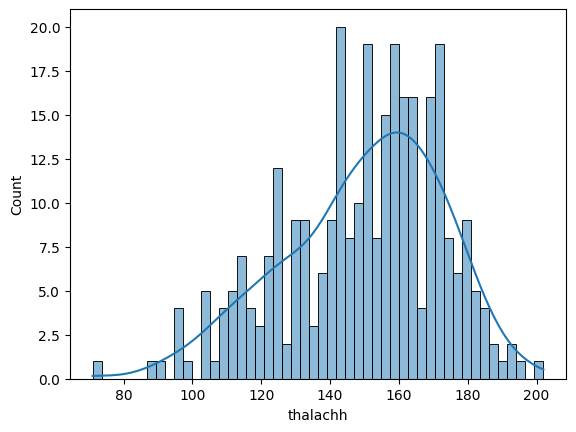

oldpeak distribution with hist:


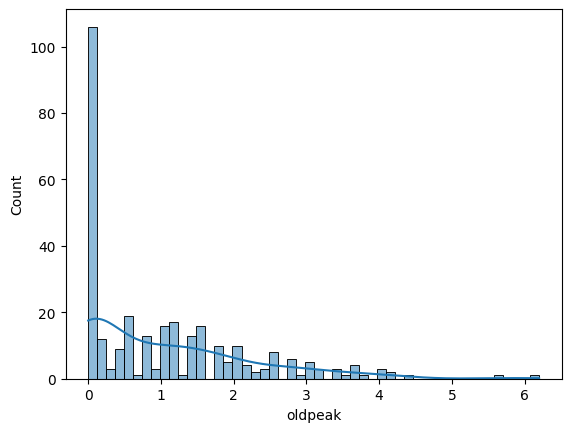

output distribution with hist:


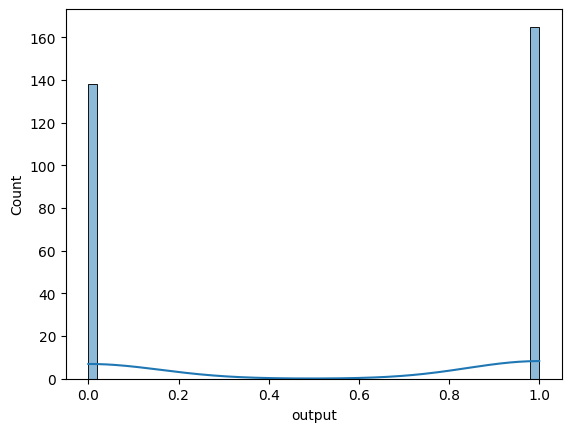

In [24]:
for i in num_cols:
    histPlot(i)

In [25]:
num_cols


['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']

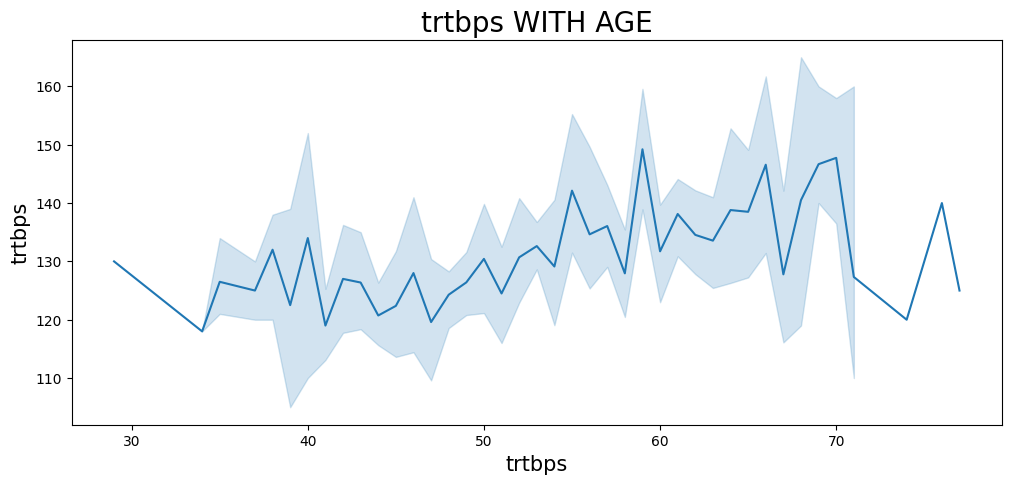

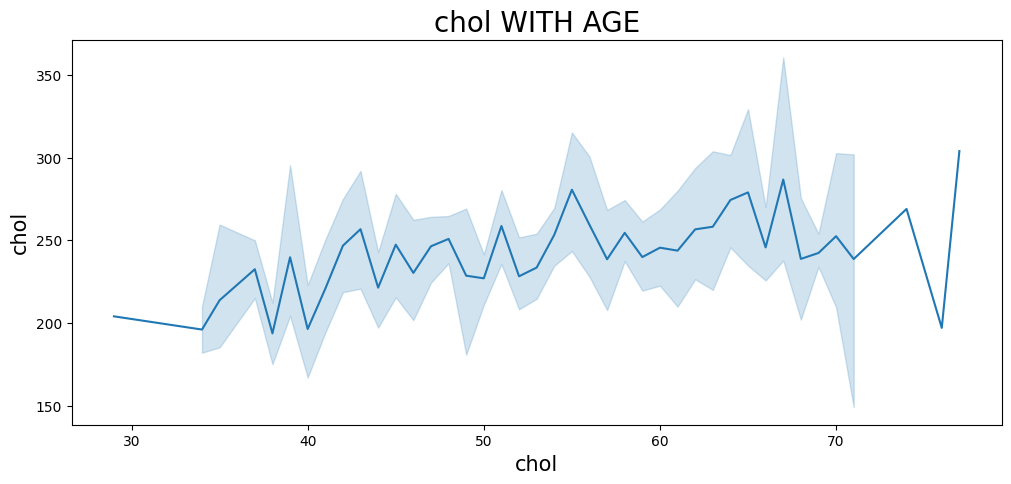

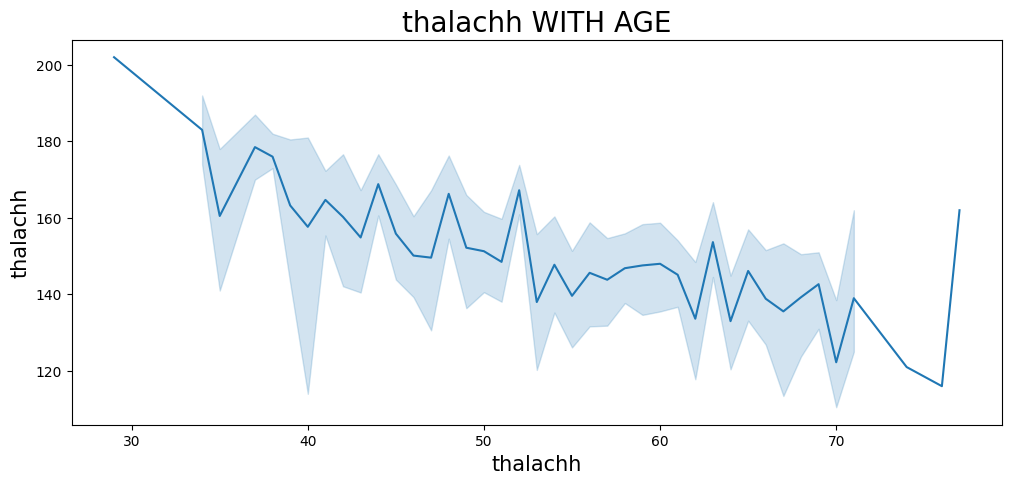

In [26]:
for i in ['trtbps', 'chol', 'thalachh']:
    plt.figure(figsize=(12,5))
    sns.lineplot(y=i,x="age",data=df)
    plt.title(f"{i} WITH AGE",fontsize=20)
    plt.xlabel(i,fontsize=15)
    plt.ylabel(i,fontsize=15)
    plt.show()

There is no strong Relationship with age and heart attack.So we can't say with Increasing the Age There is high Chance of Heart attack or Low Chance of Heart Attack.


the body With Increase in Age.

There is high chance of Increase in Cholestrol Level in the body with increase in Age.

There is high chance of Increase in Heart Rate in the body with increase in Age

In [27]:
scaler = StandardScaler()
scaler

StandardScaler()

In [28]:
scaled_array = scaler.fit_transform(df[num_cols[:-1]])

In [29]:
scaled_array 

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

In [30]:
# let's collect standardized numeric columns in dataframe
df_dummy = pd.DataFrame(scaled_array, columns = num_cols[:-1])
df_dummy.head()


,age,trtbps,chol,thalachh,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


In [31]:
# let's add the target variable
df_dummy = pd.concat([df_dummy, df.loc[:, "output"]], axis = 1)
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1


In [32]:
data_melted = pd.melt(df_dummy, id_vars = "output", var_name = "features", value_name = "value")
data_melted

,output,features,value
0,1,age,0.952197
1,1,age,-1.915313
2,1,age,-1.474158
3,1,age,0.180175
4,1,age,0.290464
...,...,...,...
1510,0,oldpeak,-0.724323
1511,0,oldpeak,0.138373
1512,0,oldpeak,2.036303
1513,0,oldpeak,0.138373


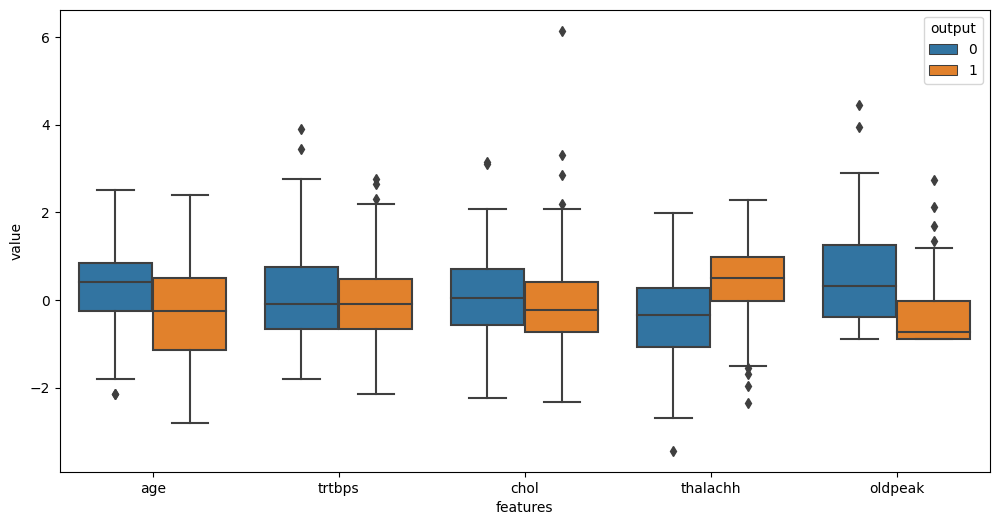

In [33]:
# box plot
plt.figure(figsize = (12,6))
sns.boxplot(x = "features", y = "value", hue = "output", data= data_melted)
plt.show()

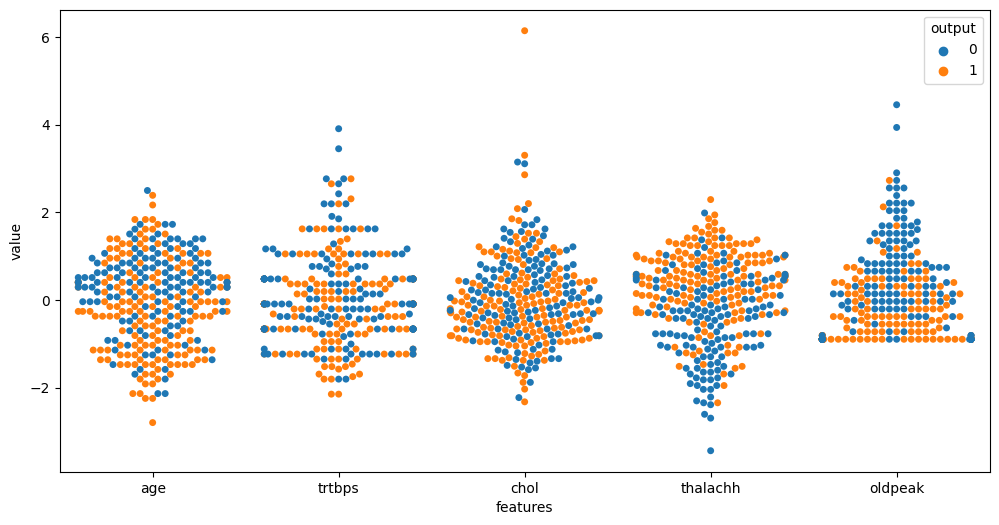

In [34]:
# swarm plot
plt.figure(figsize = (12,6))
sns.swarmplot(x = "features", y = "value", hue = "output", data= data_melted)
plt.show()

In [35]:
cat_cols

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

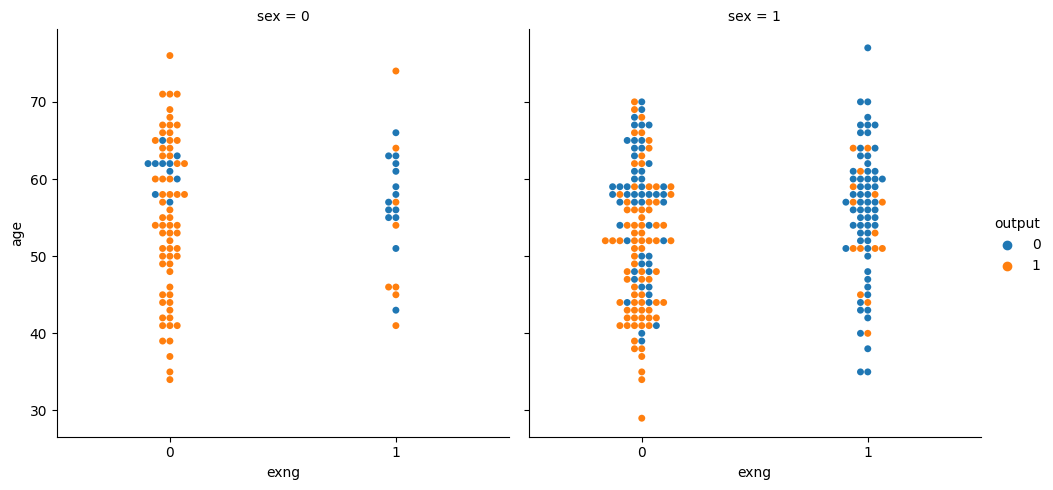

In [36]:
# we can look at the relationship between multiple features with catplot
sns.catplot(x = "exng", y = "age", hue = "output", col = "sex", kind = "swarm", data = df)
plt.show()


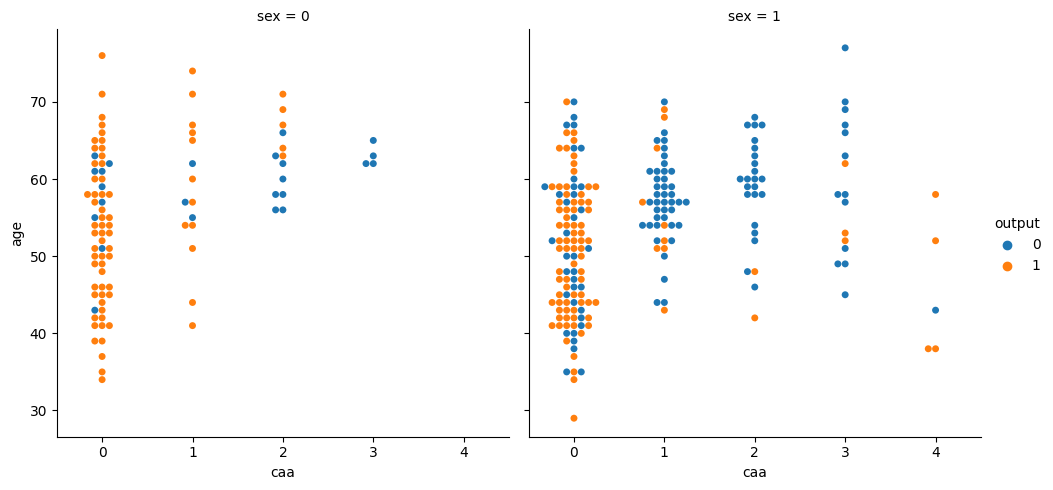

In [37]:
sns.catplot(x = "caa", y = "age", hue = "output", col = "sex", kind = "swarm", data = df)
plt.show()

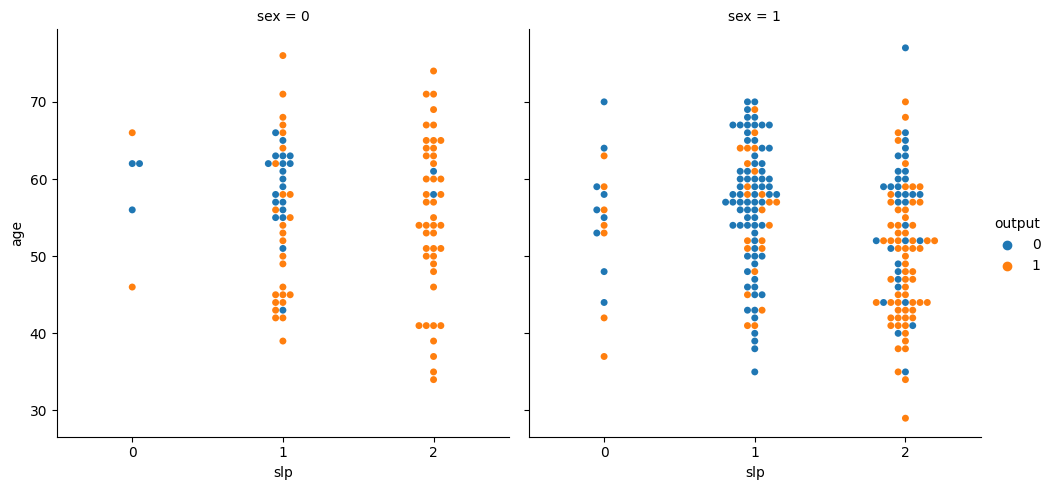

In [38]:
sns.catplot(x = "slp", y = "age", hue = "output", col = "sex", kind = "swarm", data = df)
plt.show()

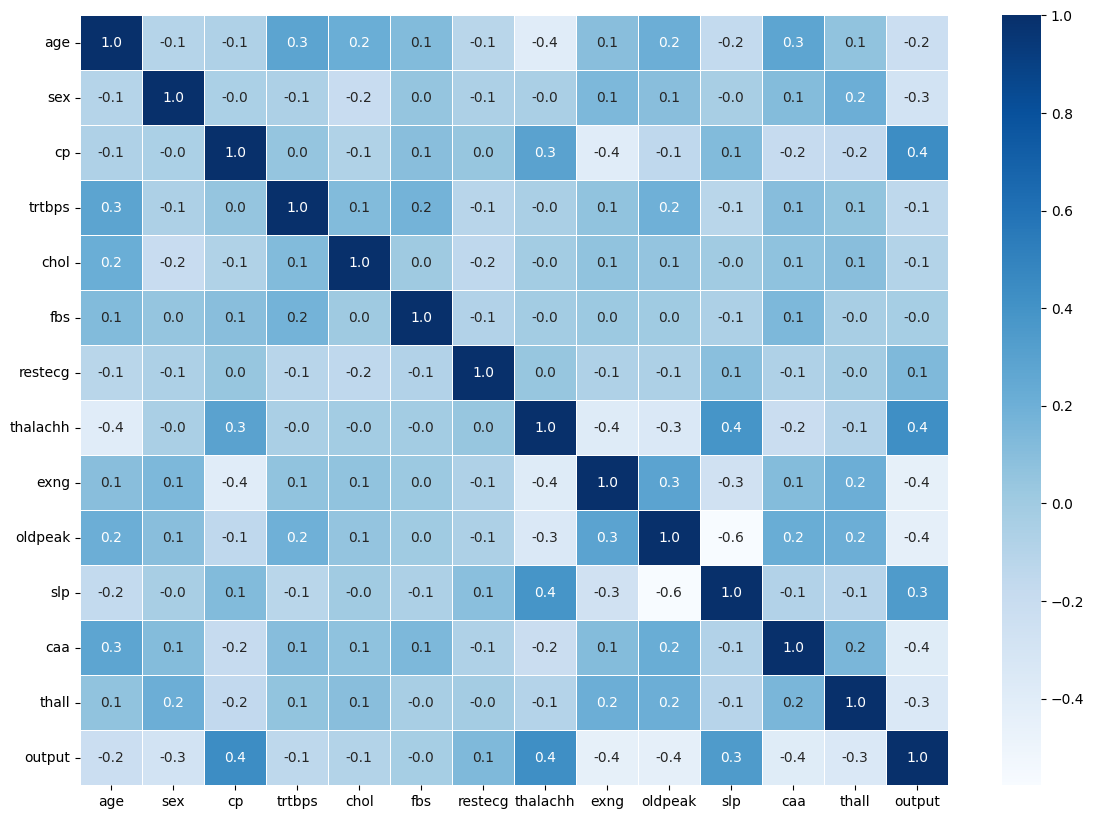

In [39]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7, cmap="Blues")
plt.show()

In [40]:
# features for outlier
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak"]


In [41]:
# outlier detection
for i in numeric_list:
    
    # IQR
    Q1 = np.percentile(df.loc[:, i],25)
    Q3 = np.percentile(df.loc[:, i],75)
    
    IQR = Q3 - Q1
    
    print("Old shape: ", df.loc[:, i].shape)             # number of rows before analysis
    
    # upper bound                                       # "where" method retrieves index from dataframe
    upper = np.where(df.loc[:, i] >= (Q3 +2.5*IQR))     # We used a coefficient of 2.5 instead of 1.5
    
    # lower bound
    lower = np.where(df.loc[:, i] <= (Q1 - 2.5*IQR))
    
    print("{} -- {}".format(upper, lower))
    
    try:
        df.drop(upper[0], inplace = True)
    except: print("KeyError: {} not found in axis".format(upper[0]))
    
    try:
        df.drop(lower[0], inplace = True)
    except:  print("KeyError: {} not found in axis".format(lower[0]))
        
    print("New shape: ", df.shape)                       # number of rows after analysis
    print("***"*20)

Old shape:  (303,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (303, 14)
************************************************************
Old shape:  (303,)
(array([223, 248]),) -- (array([], dtype=int64),)
New shape:  (301, 14)
************************************************************
Old shape:  (301,)
(array([85]),) -- (array([], dtype=int64),)
New shape:  (300, 14)
************************************************************
Old shape:  (300,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (300, 14)
************************************************************
Old shape:  (300,)
(array([203, 220]),) -- (array([], dtype=int64),)
New shape:  (298, 14)
************************************************************


In [42]:
# total change 5 lines
df.shape   

(298, 14)

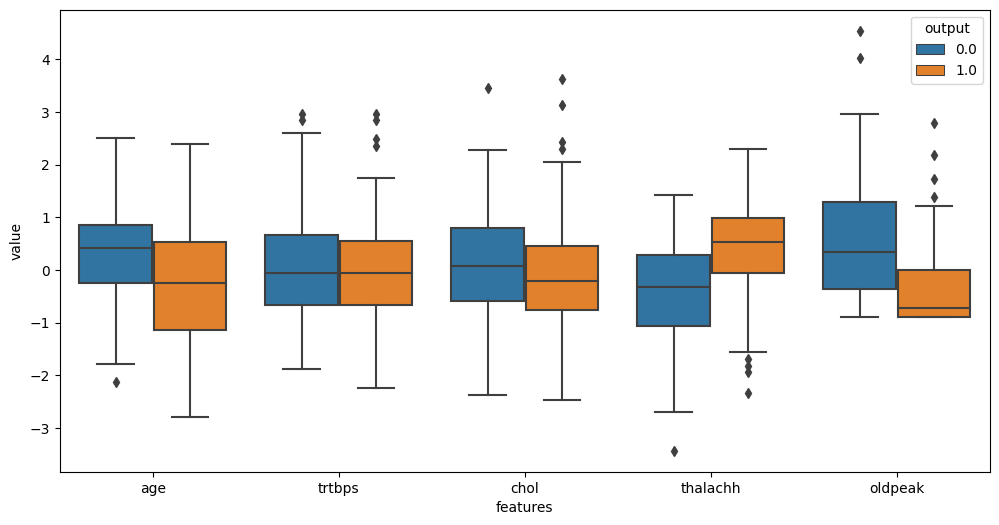

In [43]:
# data distribution over boxplot graph after outlier analysis 

scaled_array = scaler.fit_transform(df[num_cols[:-1]])

df_dummy = pd.DataFrame(scaled_array, columns = num_cols[:-1])

df_dummy = pd.concat([df_dummy, df.loc[:, "output"]], axis = 1)

data_melted = pd.melt(df_dummy, id_vars = "output", var_name = "features", value_name = "value")

plt.figure(figsize = (12,6))
sns.boxplot(x = "features", y = "value", hue = "output", data= data_melted)
plt.show()

In [44]:
df1 = df.copy()


In [45]:
cat_cols

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [46]:
df1 = pd.get_dummies(df1, columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'], drop_first = True)
df1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [47]:
X = df1.drop(["output"], axis = 1)
y = df1[["output"]]

In [48]:
X.head(3)

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (223, 22)
X_test: (75, 22)
y_train: (223, 1)
y_test: (75, 1)


In [50]:
scaler = StandardScaler()
scaler

StandardScaler()

In [51]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
X_train[:1]


array([[ 0.54572825,  2.39856618,  0.8844514 ,  0.44511858, -0.70761931,
         0.66235163, -0.41675438, -0.64139879,  3.48104109, -0.41675438,
        -1.03189865, -0.11677484, -0.69052241,  1.06968723, -0.95183134,
        -0.48876261, -0.40931561, -0.28727038, -0.13514748, -0.25881585,
        -1.0891623 ,  1.26215025]])

In [53]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [54]:
y_test_pred = model.predict(X_test)
y_test_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1])

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_test,y_test_pred)
print("Test score:")
accuracy_score

Test score:


0.88

In [56]:
print("Accuracy Score:")
print(confusion_matrix(y_test, y_test_pred))

Accuracy Score:
[[24  7]
 [ 2 42]]


In [57]:
# ROC Curve
y_pred_prob = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

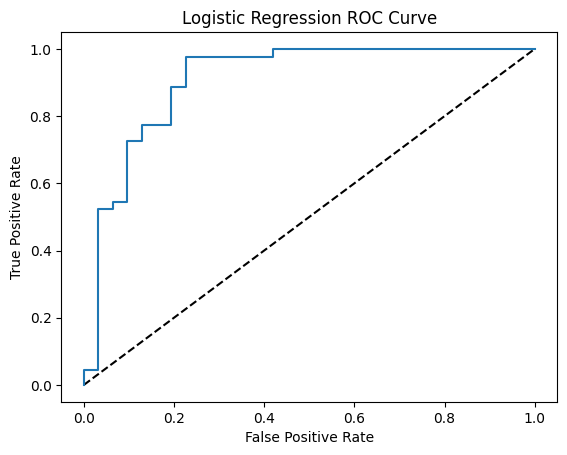

In [58]:
# plot curve
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

In [59]:
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=10)
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))

Tuned hyperparameters : {'C': 0.01, 'penalty': 'l2'}
Best Accuracy: 0.8470355731225296


In [60]:
from sklearn.metrics import accuracy_score
y_pred = logreg_cv.predict(X_test)


In [61]:
print("Test accuracy: {}".format(accuracy_score(y_pred, y_test)))

Test accuracy: 0.88


In [62]:
print("Accuracy Score:")
print(confusion_matrix(y_test, y_pred))

Accuracy Score:
[[25  6]
 [ 3 41]]


In [63]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        31
           1       0.87      0.93      0.90        44

    accuracy                           0.88        75
   macro avg       0.88      0.87      0.87        75
weighted avg       0.88      0.88      0.88        75



In [64]:
model = SVC()
model.fit(X_train, y_train)
  
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8666666666666667

In [65]:
print("Accuracy Score:")
print(confusion_matrix(y_test, y_pred))

Accuracy Score:
[[24  7]
 [ 3 41]]


In [66]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        31
           1       0.85      0.93      0.89        44

    accuracy                           0.87        75
   macro avg       0.87      0.85      0.86        75
weighted avg       0.87      0.87      0.86        75



In [67]:
#xGBClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)
Y_pred = model_xgb.predict(X_test)

In [68]:
accuracy_score(y_test,y_pred)

0.8666666666666667

In [69]:
print("Accuracy Score:")
print(confusion_matrix(y_test, y_pred))

Accuracy Score:
[[24  7]
 [ 3 41]]


In [70]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        31
           1       0.85      0.93      0.89        44

    accuracy                           0.87        75
   macro avg       0.87      0.85      0.86        75
weighted avg       0.87      0.87      0.86        75



In [71]:
# principle component analysis 
from sklearn.decomposition import PCA

In [72]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

pca = PCA(n_components = 5)        # option n_components = 4 worked better than n_components = 2
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)

In [73]:
pca_data = pd.DataFrame(X_reduced_pca, columns = ["p1","p2","p3","p4","p5"])
pca_data["target"] = y

In [74]:
pca_data


,p1,p2,p3,p4,p5,target
0,1.625467,0.810067,3.192978,-0.261555,3.277121,1.0
1,-1.318276,-0.383451,-0.791673,0.299172,1.716798,1.0
2,-2.646941,0.283315,0.186090,-1.735856,-0.180581,1.0
3,-2.554961,-0.671967,0.446444,-1.396403,-0.565053,1.0
4,-1.410184,1.075283,0.117616,-0.236698,-1.982308,1.0
...,...,...,...,...,...,...
293,1.895998,-0.173228,-0.803098,-0.402684,-0.705664,0.0
294,1.379082,-1.512187,0.145944,-1.182165,1.036557,0.0
295,2.930180,-0.365207,2.098170,0.168448,1.150111,0.0
296,2.658636,-1.899669,-1.819665,-0.044966,-0.287804,0.0


In [75]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_reduced_pca, y, test_size = 0.20, random_state = 42)

In [76]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model_xgb = XGBClassifier()
model_xgb.fit(X_train_pca,Y_train_pca)
y_pred = model_xgb.predict(X_test_pca)


In [77]:
accuracy_score(Y_test_pca,y_pred)

0.85

In [78]:
print("Accuracy Score:")
print(confusion_matrix(Y_test_pca, y_pred))

Accuracy Score:
[[20  3]
 [ 6 31]]


In [79]:
# classification report
print(classification_report(Y_test_pca, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        23
           1       0.91      0.84      0.87        37

    accuracy                           0.85        60
   macro avg       0.84      0.85      0.84        60
weighted avg       0.86      0.85      0.85        60

